In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from helper import wrap_labels

In [2]:
df = pd.read_csv('data/final_data.csv', sep=',')

In [3]:
df = df.drop(["Unnamed: 0"], axis=1)

In [4]:
df.head()

,Home Team Possession %,Home Team Off Target Shots,Home Team On Target Shots,Home Team Corners,Home Team Throw Ins,Home Team Pass Success %,Home Team Aerials Won,Home Team Clearances,Home Team Fouls,Home Team Yellow Cards,...,Away Team On Target Shots,Away Team Corners,Away Team Throw Ins,Away Team Pass Success %,Away Team Aerials Won,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Red Cards,Full Time Result
0,40,5.0,3.0,5.0,13.0,69.0,11.0,16.0,13.0,3.0,...,5.0,4.0,22.0,84.0,17.0,14.0,9.0,3.0,0.0,0
1,47,4.0,3.0,3.0,20.0,76.0,13.0,16.0,23.0,4.0,...,1.0,3.0,27.0,79.0,14.0,16.0,8.0,2.0,1.0,1
2,53,6.0,3.0,5.0,25.0,79.0,20.0,21.0,13.0,1.0,...,1.0,3.0,30.0,76.0,10.0,14.0,26.0,3.0,0.0,0
3,56,7.0,6.0,11.0,26.0,81.0,19.0,25.0,8.0,3.0,...,2.0,7.0,19.0,70.0,11.0,20.0,9.0,3.0,0.0,1
4,41,5.0,5.0,5.0,28.0,60.0,29.0,17.0,13.0,4.0,...,4.0,6.0,36.0,75.0,25.0,20.0,14.0,1.0,0.0,0


# Machine Learning  Baseline Models

In [5]:
# Test train data split
X = df.drop("Full Time Result", axis=1)
y = df["Full Time Result"]
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=42)

### Naive bayes model

In [6]:
np.random.seed(42)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

print(classification_report(y_test, y_pred_gnb))
gnb_report = classification_report(y_test, y_pred_gnb, output_dict=True)

              precision    recall  f1-score   support

           0       0.71      0.76      0.73       247
           1       0.35      0.40      0.37       110
           2       0.71      0.58      0.64       175

    accuracy                           0.63       532
   macro avg       0.59      0.58      0.58       532
weighted avg       0.64      0.63      0.63       532



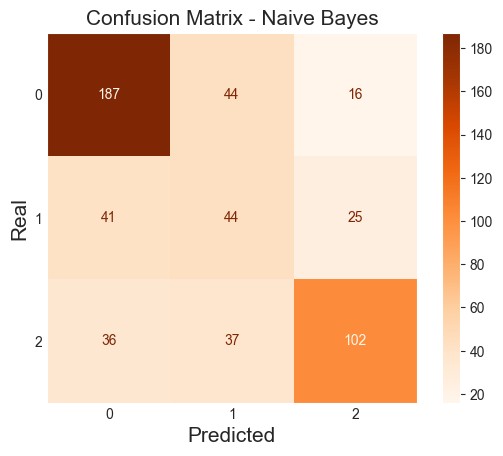

In [10]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gnb, cmap='Oranges')
plt.title("Confusion Matrix - Naive Bayes",fontsize=15)
plt.xlabel("Predicted", fontsize=15)
plt.ylabel("Real", fontsize=15)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(visible=False)
plt.show()

### Decision tree model

In [11]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

print(classification_report(y_test, y_pred_dtc))
dtc_report = classification_report(y_test, y_pred_dtc, output_dict=True)

              precision    recall  f1-score   support

           0       0.65      0.67      0.66       247
           1       0.26      0.37      0.31       110
           2       0.59      0.42      0.49       175

    accuracy                           0.52       532
   macro avg       0.50      0.49      0.49       532
weighted avg       0.55      0.52      0.53       532



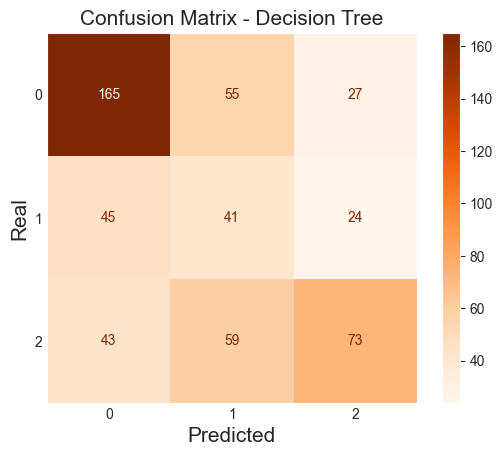

In [12]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dtc, cmap='Oranges')
plt.title("Confusion Matrix - Decision Tree",fontsize=15)
plt.xlabel("Predicted", fontsize=15)
plt.ylabel("Real", fontsize=15)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(visible=False)
plt.show()

### Random forest model

In [13]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

print(classification_report(y_test, y_pred_rfc))
rfc_report = classification_report(y_test, y_pred_rfc, output_dict=True)

              precision    recall  f1-score   support

           0       0.70      0.87      0.78       247
           1       0.45      0.31      0.37       110
           2       0.73      0.61      0.66       175

    accuracy                           0.67       532
   macro avg       0.62      0.60      0.60       532
weighted avg       0.65      0.67      0.65       532



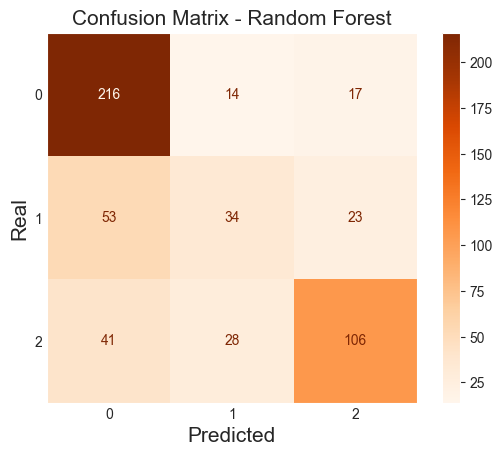

In [15]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rfc, cmap='Oranges')
plt.title("Confusion Matrix - Random Forest",fontsize=15)
plt.xlabel("Predicted", fontsize=15)
plt.ylabel("Real", fontsize=15)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(visible=False)
plt.show()

### Logistic Regression model

In [16]:
# Scaling data
mm_scaler = sklearn.preprocessing.MinMaxScaler()
mm_scaler.fit(X_train)
X_train_s = mm_scaler.transform(X_train)
X_test_s = mm_scaler.transform(X_test)

In [21]:
lr = LogisticRegression(random_state=42, max_iter=200)
lr.fit(X_train_s, y_train)
y_pred_lr = lr.predict(X_test_s)
lr_report = classification_report(y_test, y_pred_lr, output_dict=True)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77       247
           1       0.45      0.27      0.34       110
           2       0.75      0.66      0.70       175

    accuracy                           0.68       532
   macro avg       0.63      0.60      0.60       532
weighted avg       0.66      0.68      0.66       532



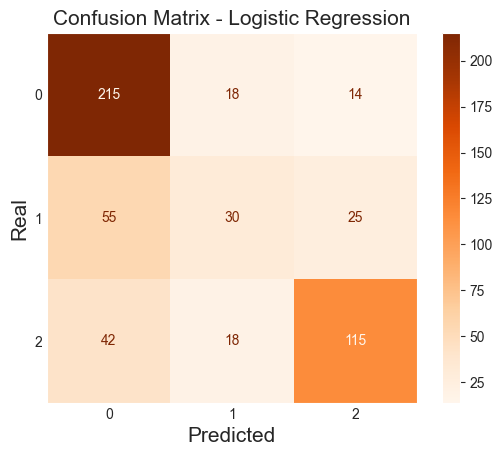

In [22]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, cmap='Oranges')
plt.title("Confusion Matrix - Logistic Regression",fontsize=15)
plt.xlabel("Predicted", fontsize=15)
plt.ylabel("Real", fontsize=15)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(visible=False)
plt.show()

### KNN model with normalization

In [23]:
X_normalized = sklearn.preprocessing.normalize(X, norm='l2')
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(
X_normalized, y, test_size=0.20, random_state=42)

In [25]:
knn = KNeighborsClassifier()
knn.fit(X_train_n,y_train_n)
y_pred_knn = knn.predict(X_test_n)
knn_report = classification_report(y_test, y_pred_knn, output_dict=True)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.57      0.77      0.66       247
           1       0.26      0.25      0.26       110
           2       0.57      0.31      0.40       175

    accuracy                           0.51       532
   macro avg       0.47      0.44      0.44       532
weighted avg       0.51      0.51      0.49       532



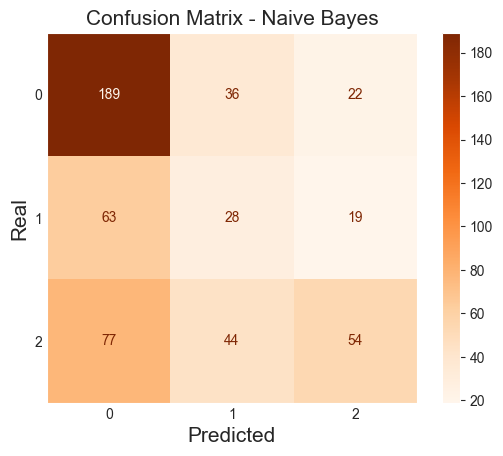

In [26]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, cmap='Oranges')
plt.title("Confusion Matrix - Naive Bayes",fontsize=15)
plt.xlabel("Predicted", fontsize=15)
plt.ylabel("Real", fontsize=15)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(visible=False)
plt.show()

# Base Model comparison

In [27]:
labels = ['Naive Bayes', 'Decision Tree', 'Random Forest','Logistic Regression', 'KNN']

In [28]:
reports_base = [gnb_report, dtc_report, rfc_report,lr_report,knn_report]

c0_precision = {}
c1_precision = {}
c2_precision = {}

c0_recall = {}
c1_recall = {}
c2_recall = {}

accuracy = {}
precision = {}
recall = {}
f1 = {}
for report,label in zip(reports_base, labels):
    c0_precision[label] = round(report['0']['precision'],3)
    c1_precision[label] = round(report['1']['precision'],3)
    c2_precision[label] = round(report['2']['precision'],3)
    c0_recall[label] = round(report['0']['recall'],3)
    c1_recall[label] = round(report['1']['recall'],3)
    c2_recall[label] = round(report['2']['recall'],3)
    accuracy[label] = round(report['accuracy'],3)
    precision[label] = round(report['macro avg']['precision'],3)
    recall[label] = round(report['macro avg']['recall'],3)
    f1[label] = round(report['macro avg']['f1-score'],3)

### Accuracy

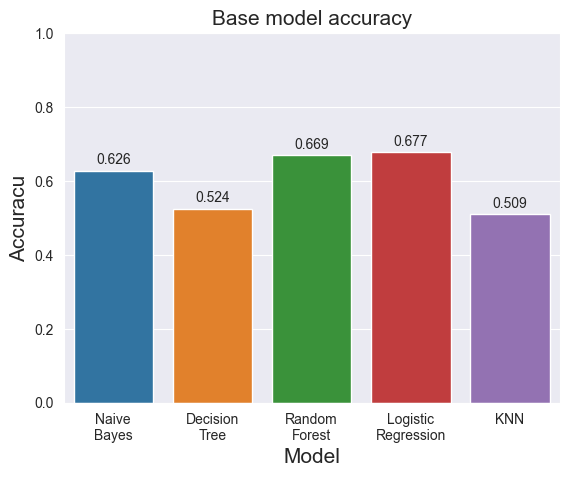

In [29]:
ax = sns.barplot(x=list(accuracy.keys()), y=list(accuracy.values()))
for i in ax.containers:
    ax.bar_label(i, padding=3)
plt.ylim(0.0,1.0)
plt.title("Base model accuracy",fontsize=15)
plt.xlabel("Model", fontsize=15)
plt.ylabel("Accuracu",fontsize=15)
wrap_labels(ax, 10)

### Precision

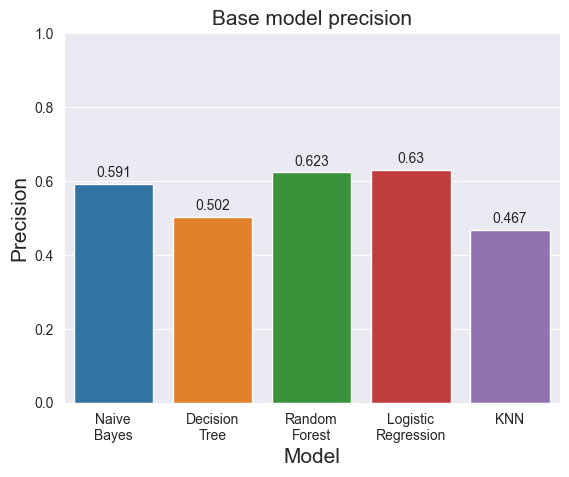

In [30]:
ax = sns.barplot(x=list(precision.keys()), y=list(precision.values()))
for i in ax.containers:
    ax.bar_label(i, padding=3)
plt.ylim(0.0,1.0)
plt.title("Base model precision",fontsize=15)
plt.xlabel("Model", fontsize=15)
plt.ylabel("Precision",fontsize=15)
wrap_labels(ax, 10)

### Czułość

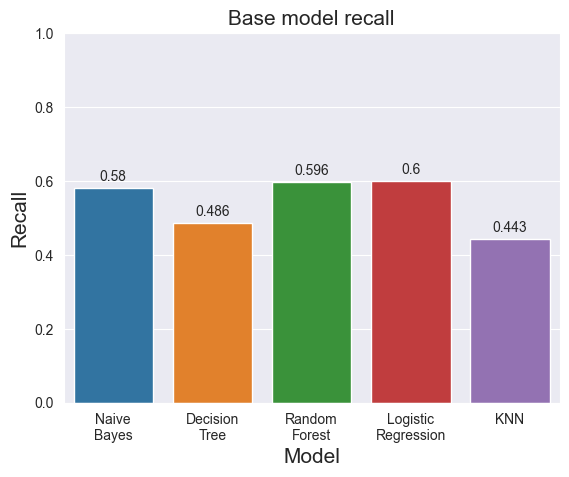

In [31]:
ax = sns.barplot(x=list(recall.keys()), y=list(recall.values()))
for i in ax.containers:
    ax.bar_label(i, padding=3)
plt.ylim(0.0,1.0)
plt.title("Base model recall",fontsize=15)
plt.xlabel("Model", fontsize=15)
plt.ylabel("Recall",fontsize=15)
wrap_labels(ax, 10)

## Class 0 - Home Win  analysis

### Precision

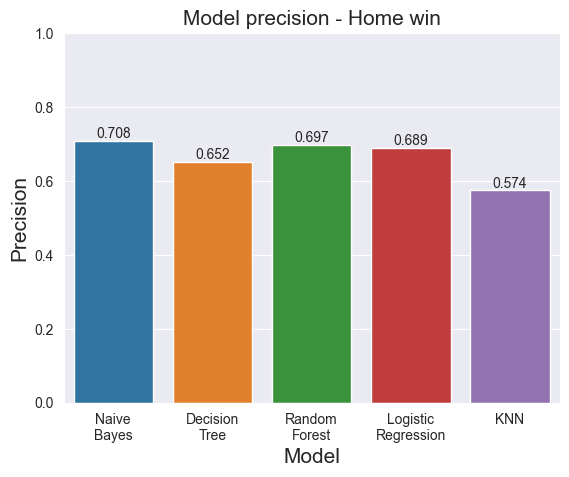

In [33]:
ax = sns.barplot(x=list(c0_precision.keys()), y=list(c0_precision.values()))
for i in ax.containers:
    ax.bar_label(i,)
plt.ylim(0.0,1.0)
plt.title("Model precision - Home win",fontsize=15)
plt.xlabel("Model", fontsize=15)
plt.ylabel("Precision",fontsize=15)
wrap_labels(ax, 10)

### Recall

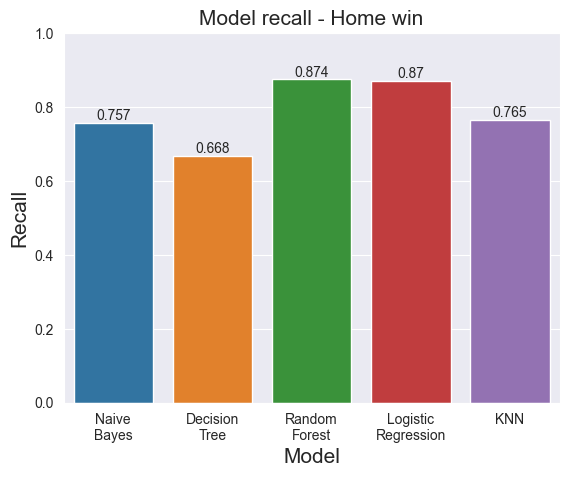

In [34]:
ax = sns.barplot(x=list(c0_recall.keys()), y=list(c0_recall.values()))
for i in ax.containers:
    ax.bar_label(i,)
plt.ylim(0.0,1.0)
plt.title("Model recall - Home win",fontsize=15)
plt.xlabel("Model", fontsize=15)
plt.ylabel("Recall",fontsize=15)
wrap_labels(ax, 10)

## Class 1 - Draw analysis

### Precision

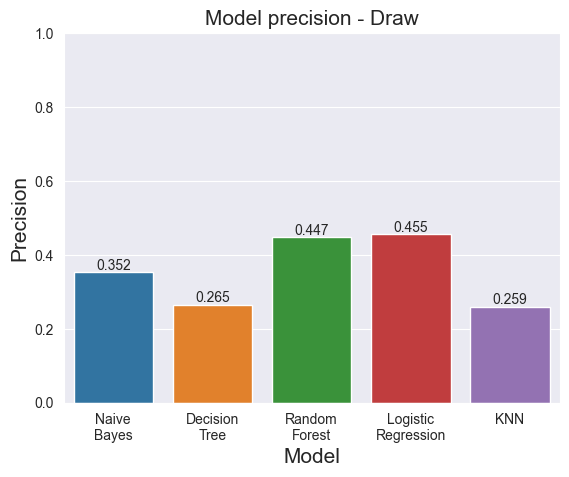

In [35]:
ax = sns.barplot(x=list(c1_precision.keys()), y=list(c1_precision.values()))
for i in ax.containers:
    ax.bar_label(i,)
plt.ylim(0.0,1.0)
plt.title("Model precision - Draw",fontsize=15)
plt.xlabel("Model", fontsize=15)
plt.ylabel("Precision",fontsize=15)
wrap_labels(ax, 10)

### Recall

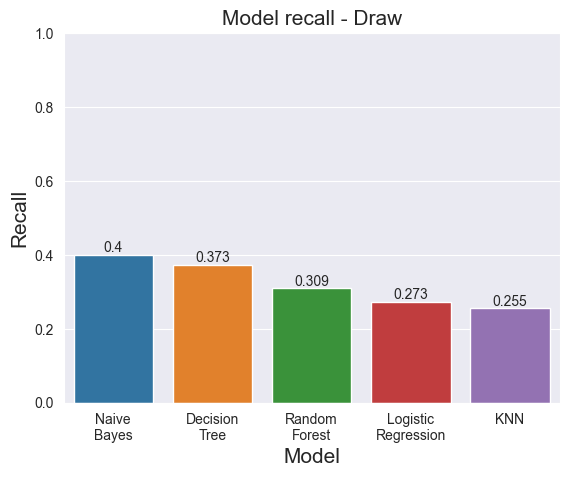

In [36]:
ax = sns.barplot(x=list(c1_recall.keys()), y=list(c1_recall.values()))
for i in ax.containers:
    ax.bar_label(i,)
plt.ylim(0.0,1.0)
plt.title("Model recall - Draw",fontsize=15)
plt.xlabel("Model", fontsize=15)
plt.ylabel("Recall",fontsize=15)
wrap_labels(ax, 10)

## Class 2 - Away Win analysis

### Precision

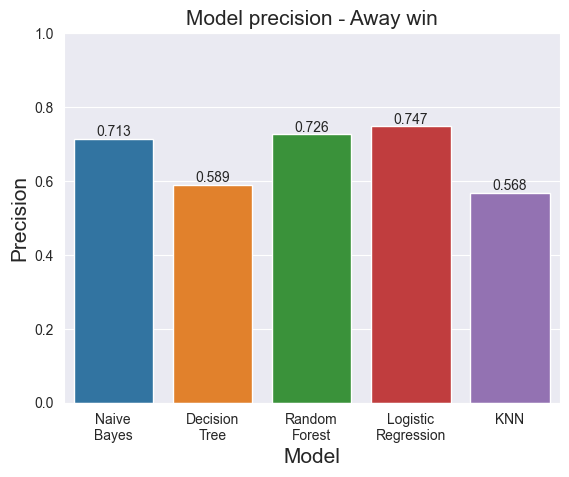

In [37]:
ax = sns.barplot(x=list(c2_precision.keys()), y=list(c2_precision.values()))
for i in ax.containers:
    ax.bar_label(i,)
plt.ylim(0.0,1.0)
plt.title("Model precision - Away win",fontsize=15)
plt.xlabel("Model", fontsize=15)
plt.ylabel("Precision",fontsize=15)
wrap_labels(ax, 10)

### Recall

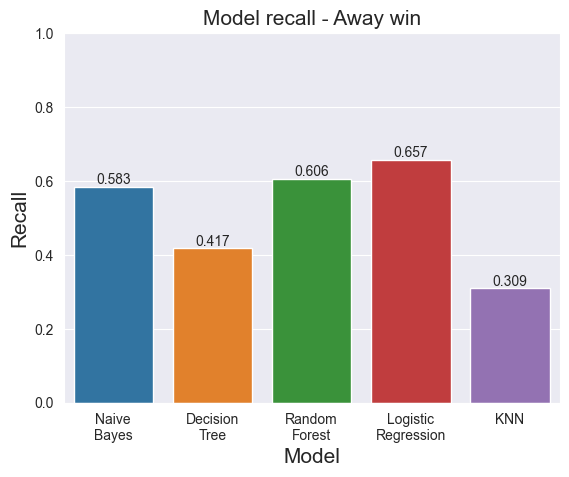

In [38]:
ax = sns.barplot(x=list(c2_recall.keys()), y=list(c2_recall.values()))
for i in ax.containers:
    ax.bar_label(i,)
plt.ylim(0.0,1.0)
plt.title("Model recall - Away win",fontsize=15)
plt.xlabel("Model", fontsize=15)
plt.ylabel("Recall",fontsize=15)
wrap_labels(ax, 10)

# Tuning Hyperparameters

### Decision Tree tuning

In [39]:
dtc_params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None,1,2,3,4,5,10],
    'min_samples_split': [2,3,4],
    'min_samples_leaf':[1,2,3,4,5],
    'max_features': [None, 'sqrt', 'log2'],
    'random_state': [42]
} # final iteration of grid search params that resulted with finding the best score

dtc = DecisionTreeClassifier()
gs_dtc = GridSearchCV(estimator=dtc, param_grid=dtc_params,cv=5)

gs_dtc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4], 'random_state': [42]})

In [40]:
gs_dtc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 42}

In [41]:
gs_y_pred = gs_dtc.predict(X_test)
print(classification_report(y_test, gs_y_pred))
dtc_report_tuned = classification_report(y_test, gs_y_pred,output_dict=True)

              precision    recall  f1-score   support

           0       0.65      0.82      0.72       247
           1       0.78      0.06      0.12       110
           2       0.59      0.71      0.65       175

    accuracy                           0.63       532
   macro avg       0.67      0.53      0.50       532
weighted avg       0.66      0.63      0.57       532



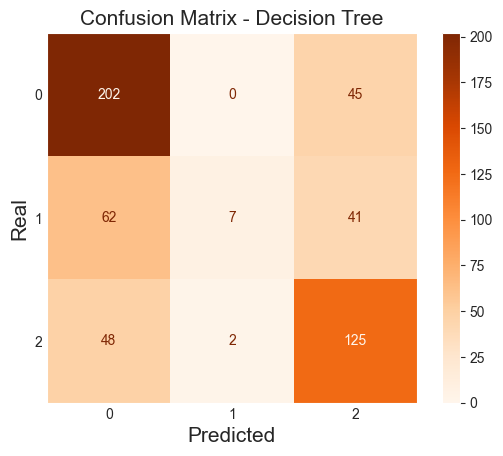

In [42]:
ConfusionMatrixDisplay.from_predictions(y_test, gs_y_pred, cmap='Oranges')
plt.title("Confusion Matrix - Decision Tree",fontsize=15)
plt.xlabel("Predicted", fontsize=15)
plt.ylabel("Real", fontsize=15)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(visible=False)
plt.show()

### Random Forest Tuning

In [43]:
rfc_params ={
    'n_estimators': [400],
    'criterion': ['entropy'],
    'max_depth': [10],
    'min_samples_split': [2,3,4],
    'max_features': ['sqrt'],
    'random_state': [42]
} # final iteration of grid search params that resulted in finding the best score
rfc = RandomForestClassifier()
gs_rfc = GridSearchCV(estimator=rfc,param_grid=rfc_params,cv=5)
gs_rfc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [10],
                         'max_features': ['sqrt'],
                         'min_samples_split': [2, 3, 4], 'n_estimators': [400],
                         'random_state': [42]})

In [44]:
gs_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'n_estimators': 400,
 'random_state': 42}

In [45]:
rfc_y_pred = gs_rfc.predict(X_test)
print(classification_report(y_test,rfc_y_pred))
rfc_report_tuned = classification_report(y_test,rfc_y_pred, output_dict=True)

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       247
           1       0.49      0.26      0.34       110
           2       0.75      0.64      0.69       175

    accuracy                           0.68       532
   macro avg       0.64      0.60      0.60       532
weighted avg       0.67      0.68      0.66       532



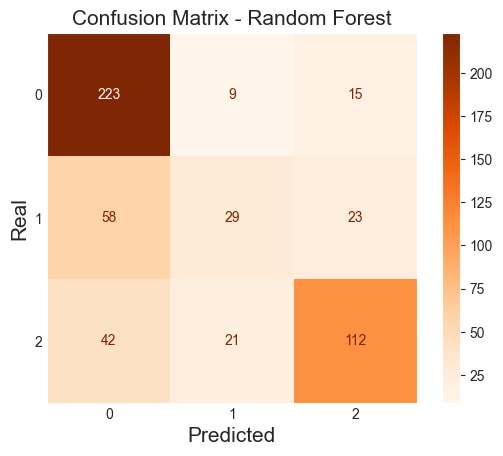

In [46]:
ConfusionMatrixDisplay.from_predictions(y_test, rfc_y_pred, cmap='Oranges')
plt.title("Confusion Matrix - Random Forest",fontsize=15)
plt.xlabel("Predicted", fontsize=15)
plt.ylabel("Real", fontsize=15)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(visible=False)
plt.show()

### Logistic Regression Tuning

In [47]:
lr_params = {
    'solver': ['newton-cg', 'sag', 'saga', 'lbfgs'],
    'max_iter': [200,500, 1000, 1500],
    'random_state': [42]
} # final iteration of grid search params that resulted in finding the best score
lr = LogisticRegression()
gs_lr = GridSearchCV(estimator=lr, param_grid=lr_params, cv=5, verbose=1)
gs_lr.fit(X_train_s, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [200, 500, 1000, 1500],
                         'random_state': [42],
                         'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']},
             verbose=1)

In [48]:
gs_lr.best_params_

{'max_iter': 200, 'random_state': 42, 'solver': 'newton-cg'}

In [49]:
lr_y_pred = gs_lr.predict(X_test_s)
print(classification_report(y_test,lr_y_pred))
lr_report_tuned =  classification_report(y_test,lr_y_pred,output_dict=True)

              precision    recall  f1-score   support

           0       0.69      0.87      0.77       247
           1       0.45      0.27      0.34       110
           2       0.75      0.66      0.70       175

    accuracy                           0.68       532
   macro avg       0.63      0.60      0.60       532
weighted avg       0.66      0.68      0.66       532



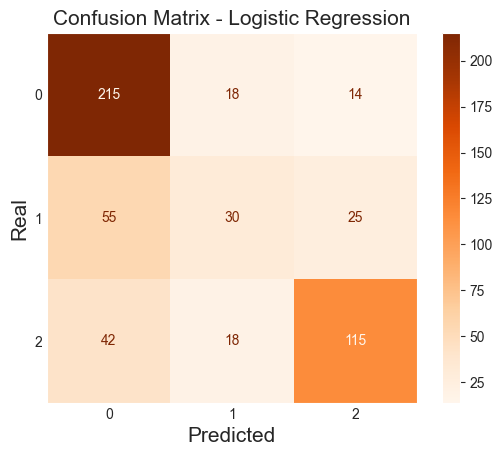

In [50]:
ConfusionMatrixDisplay.from_predictions(y_test, lr_y_pred, cmap='Oranges')
plt.title("Confusion Matrix - Logistic Regression",fontsize=15)
plt.xlabel("Predicted", fontsize=15)
plt.ylabel("Real", fontsize=15)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(visible=False)
plt.show()

### KNN Tuning

In [51]:
knn_params ={
    'n_neighbors': list(range(25,50)),
    'weights': ['uniform', 'distance'],
    'p': [1,2]
} # final iteration of grid search params that resulted in finding the best score
knn = KNeighborsClassifier()
gs_knn = GridSearchCV(estimator=knn, param_grid=knn_params, verbose=1)
gs_knn.fit(X_train_n, y_train_n)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
                                         35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
                                         45, 46, 47, 48, 49],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             verbose=1)

In [52]:
gs_knn.best_params_

{'n_neighbors': 45, 'p': 1, 'weights': 'distance'}

In [53]:
knn_y_pred = gs_knn.predict(X_test_n)
print(classification_report(y_test_n,knn_y_pred))
knn_report_tuned = classification_report(y_test_n,knn_y_pred, output_dict=True)

              precision    recall  f1-score   support

           0       0.63      0.86      0.73       247
           1       0.34      0.20      0.25       110
           2       0.62      0.46      0.53       175

    accuracy                           0.59       532
   macro avg       0.53      0.51      0.50       532
weighted avg       0.57      0.59      0.56       532



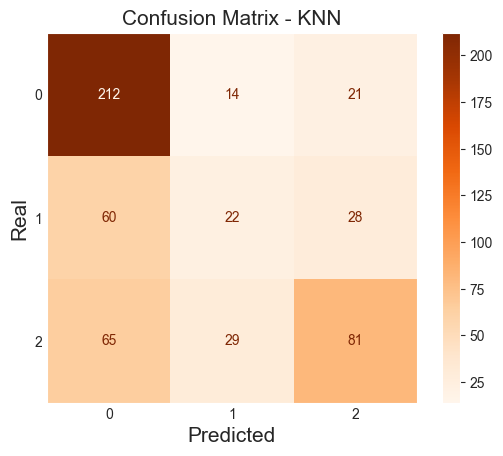

In [54]:
ConfusionMatrixDisplay.from_predictions(y_test, knn_y_pred, cmap='Oranges')
plt.title("Confusion Matrix - KNN",fontsize=15)
plt.xlabel("Predicted", fontsize=15)
plt.ylabel("Real", fontsize=15)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(visible=False)
plt.show()

# Base vs tuned models comparison

In [55]:
reports_tuned = [gnb_report, dtc_report_tuned, rfc_report_tuned,lr_report_tuned,knn_report_tuned]

c0_precision_tuned = {}
c1_precision_tuned = {}
c2_precision_tuned = {}

c0_recall_tuned = {}
c1_recall_tuned = {}
c2_recall_tuned = {}

accuracy_tuned = {}
precision_tuned = {}
recall_tuned= {}
f1_tuned = {}
for report,label in zip(reports_tuned, labels):
    c0_precision_tuned[label] = round(report['0']['precision'],3)
    c1_precision_tuned[label] = round(report['1']['precision'],3)
    c2_precision_tuned[label] = round(report['2']['precision'],3)
    c0_recall_tuned[label] = round(report['0']['recall'],3)
    c1_recall_tuned[label] = round(report['1']['recall'],3)
    c2_recall_tuned[label] = round(report['2']['recall'],3)
    accuracy_tuned[label] = round(report['accuracy'],3)
    precision_tuned[label] = round(report['macro avg']['precision'],3)
    recall_tuned[label] = round(report['macro avg']['recall'],3)
    f1_tuned[label] = round(report['macro avg']['f1-score'],3)

In [56]:
sns.set_style("whitegrid")

### Accuracy

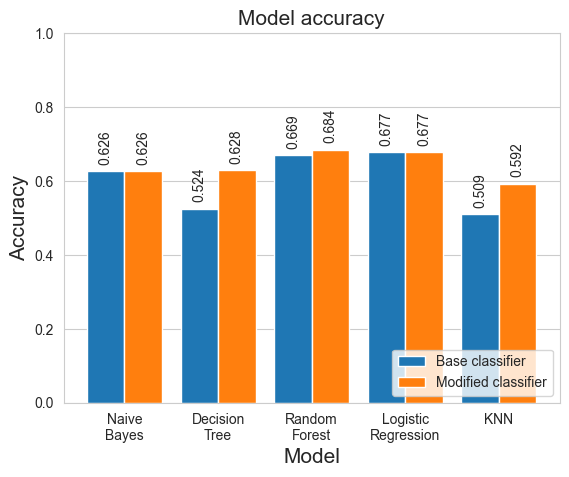

In [58]:
df_accuracies = pd.DataFrame([accuracy, accuracy_tuned]).transpose()
ax = df_accuracies.plot(kind='bar', width=0.8)
for i in ax.containers:
    ax.bar_label(i,rotation='vertical', padding=5)
plt.grid(axis='x')
ax.legend(('Base classifier','Modified classifier'),loc='lower right', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.title("Model accuracy",fontsize=15)
plt.xlabel("Model", fontsize=15)
plt.ylabel("Accuracy",fontsize=15)
plt.ylim(0.0,1.0)
wrap_labels(ax, 10)

### Precision

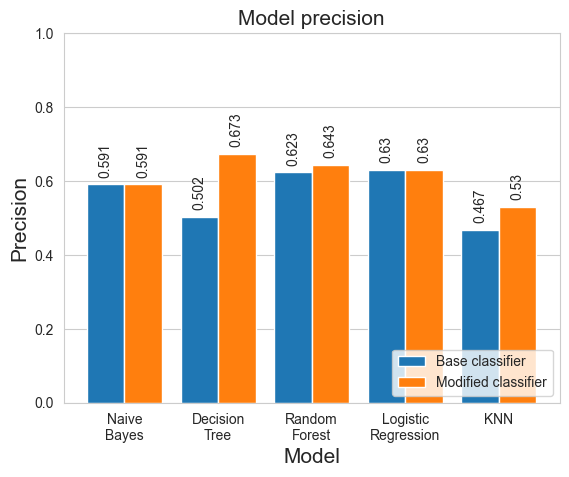

In [59]:
df_precision = pd.DataFrame([precision, precision_tuned]).transpose()
ax = df_precision.plot(kind='bar', width=0.8)
for i in ax.containers:
    ax.bar_label(i,rotation='vertical', padding=5)
plt.grid(axis='x')
ax.legend(('Base classifier','Modified classifier'),loc='lower right', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.title("Model precision",fontsize=15)
plt.xlabel("Model", fontsize=15)
plt.ylabel("Precision",fontsize=15)
plt.ylim(0.0,1.0)
wrap_labels(ax, 10)

### Recall

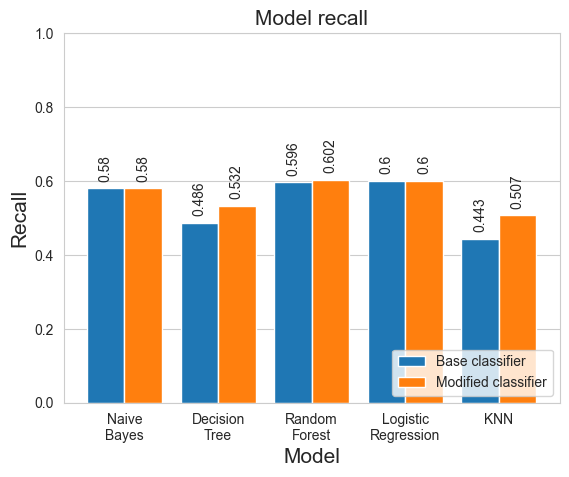

In [60]:
df_recall = pd.DataFrame([recall, recall_tuned]).transpose()
ax = df_recall.plot(kind='bar', width=0.8)
for i in ax.containers:
    ax.bar_label(i,rotation='vertical', padding=5)
plt.grid(axis='x')
ax.legend(('Base classifier','Modified classifier'),loc='lower right', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.title("Model recall",fontsize=15)
plt.xlabel("Model", fontsize=15)
plt.ylabel("Recall",fontsize=15)
plt.ylim(0.0,1.0)
wrap_labels(ax, 10)

## Class 0 - Home Win Comparison

### Precision

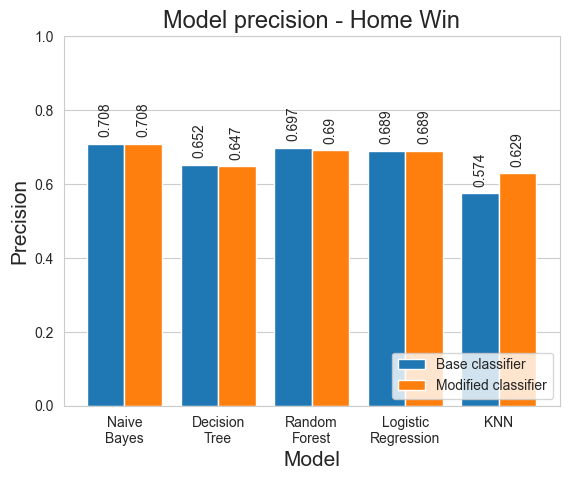

In [62]:
df_precision_0 = pd.DataFrame([c0_precision, c0_precision_tuned]).transpose()
ax = df_precision_0.plot(kind='bar', width=0.8)
for i in ax.containers:
    ax.bar_label(i,rotation='vertical', padding=5)
plt.grid(axis='x')
ax.legend(('Base classifier','Modified classifier'),loc='lower right', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.title("Model precision - Home Win",fontsize=17)
plt.xlabel("Model", fontsize=15)
plt.ylabel("Precision",fontsize=15)
plt.ylim(0.0,1.0)
wrap_labels(ax, 10)

### Recall

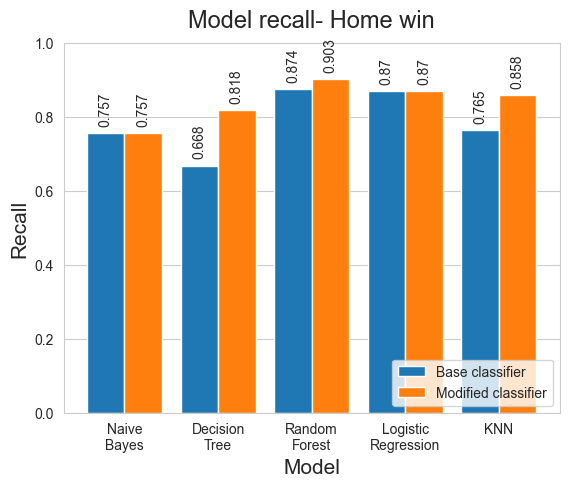

In [63]:
df_recall_0 = pd.DataFrame([c0_recall, c0_recall_tuned]).transpose()
ax = df_recall_0.plot(kind='bar', width=0.8)
for i in ax.containers:
    ax.bar_label(i,rotation='vertical', padding=5)
plt.grid(axis='x')
ax.legend(('Base classifier','Modified classifier'),loc='lower right', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.title("Model recall- Home win",fontsize=17, y=1.02)
plt.xlabel("Model", fontsize=15)
plt.ylabel("Recall",fontsize=15)
plt.ylim(0.0,1.0)
wrap_labels(ax, 10)

## Class 1 - Draw Comparison

### Precision

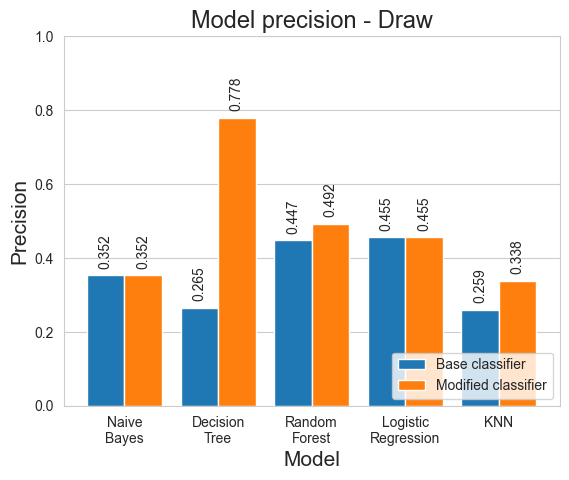

In [64]:
df_precision_1 = pd.DataFrame([c1_precision, c1_precision_tuned]).transpose()
ax = df_precision_1.plot(kind='bar', width=0.8)
for i in ax.containers:
    ax.bar_label(i,rotation='vertical', padding=5)
plt.grid(axis='x')
ax.legend(('Base classifier','Modified classifier'),loc='lower right', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.title("Model precision - Draw",fontsize=17)
plt.xlabel("Model", fontsize=15)
plt.ylabel("Precision",fontsize=15)
plt.ylim(0.0,1.0)
wrap_labels(ax, 10)

### Recall

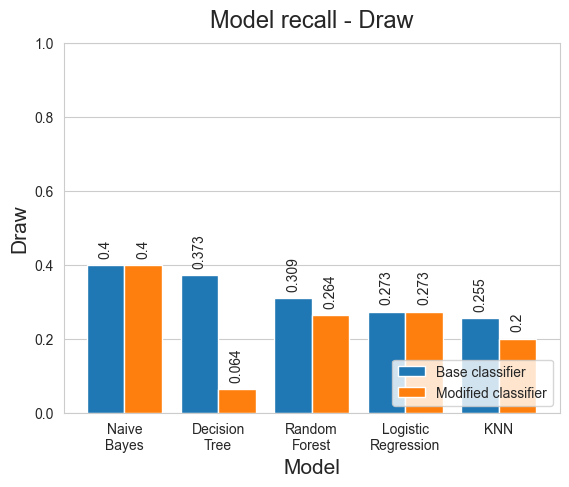

In [65]:
df_recall_1 = pd.DataFrame([c1_recall, c1_recall_tuned]).transpose()
ax = df_recall_1.plot(kind='bar', width=0.8)
for i in ax.containers:
    ax.bar_label(i,rotation='vertical', padding=5)
plt.grid(axis='x')
ax.legend(('Base classifier','Modified classifier'),loc='lower right', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.title("Model recall - Draw",fontsize=17, y=1.02)
plt.xlabel("Model", fontsize=15)
plt.ylabel("Draw",fontsize=15)
plt.ylim(0.0,1.0)
wrap_labels(ax, 10)

## Class 2 - Away Win Comparison

### Precision

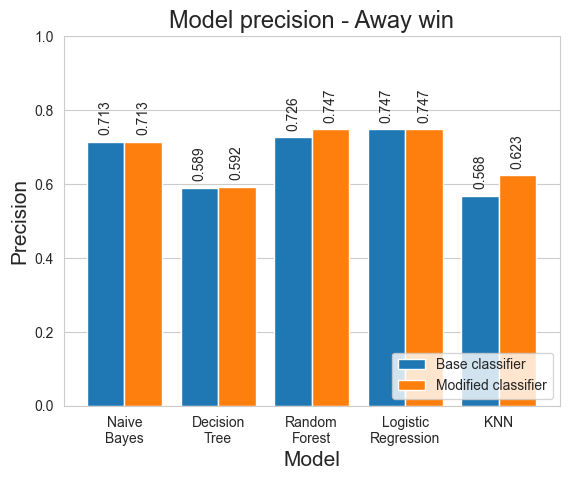

In [66]:
df_precision_2 = pd.DataFrame([c2_precision, c2_precision_tuned]).transpose()
ax = df_precision_2.plot(kind='bar', width=0.8)
for i in ax.containers:
    ax.bar_label(i,rotation='vertical', padding=5)
plt.grid(axis='x')
ax.legend(('Base classifier','Modified classifier'),loc='lower right', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.title("Model precision - Away win",fontsize=17)
plt.xlabel("Model", fontsize=15)
plt.ylabel("Precision",fontsize=15)
plt.ylim(0.0,1.0)
wrap_labels(ax, 10)

### Recall

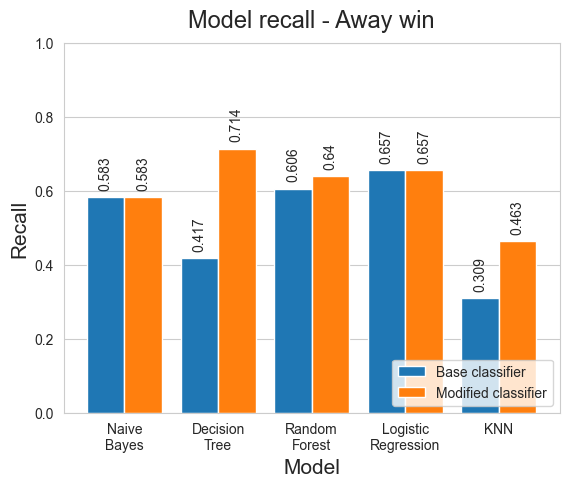

In [68]:
df_recall_2 = pd.DataFrame([c2_recall, c2_recall_tuned]).transpose()
ax = df_recall_2.plot(kind='bar', width=0.8)
for i in ax.containers:
    ax.bar_label(i,rotation='vertical', padding=5)
plt.grid(axis='x')
ax.legend(('Base classifier','Modified classifier'),loc='lower right', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.title("Model recall - Away win",fontsize=17, y=1.02)
plt.xlabel("Model", fontsize=15)
plt.ylabel("Recall",fontsize=15)
plt.ylim(0.0,1.0)
wrap_labels(ax, 10)